
#  Houses Price in Cairo 2023

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Question(s) for Analysis
**1)what is the most frequent city in the data?**

**2)What is the average house price in each city?**

**3)What is the average house space in each city?**

**4)what is the relationship between space and price?**

**5)In which city is there the lowest AVG price per sqm and in which city is the highest AVG price per sqm?**

**6)What is the percentage of houses in which the price per SQM is less than the average price per SQM in the same city?**

**7)What is the chepeast price per SQM house?**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/houses-price-in-cairo-new-2023/Houses-Price-cairo-Egypt.csv')

In [3]:
data.head()

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Furnished,Property_Type,Payment_Option,Delivery_Date
0,"2,700,000",Cairo,New Cairo - El Tagamoa,3,2.0,200,No,Apartment,Cash,Ready To Move
1,"2,700,000",Cairo,Tura,2,2.0,210,No,Apartment,Cash,Ready To Move
2,"2,100,000",Cairo,Helwan,3,2.0,200,No,Apartment,Cash,Ready To Move
3,"16,500,000",Cairo,Maadi,4,5.0,575,No,Apartment,Cash,Ready To Move
4,"2,750,000",Cairo,New Cairo - El Tagamoa,3,2.0,200,No,Apartment,Cash,Ready To Move


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Property_price_EGP    945 non-null    object 
 1   Location_governorate  715 non-null    object 
 2   Location_City         945 non-null    object 
 3   Bed_Rooms             945 non-null    object 
 4   Bath_Rooms            715 non-null    float64
 5   Home_Space_SQM        945 non-null    object 
 6   Furnished             945 non-null    object 
 7   Property_Type         945 non-null    object 
 8   Payment_Option        945 non-null    object 
 9   Delivery_Date         945 non-null    object 
dtypes: float64(1), object(9)
memory usage: 74.0+ KB


In [5]:
data.Location_governorate.unique()

array(['Cairo', nan], dtype=object)

In [6]:
data.Location_City.unique()

array(['New Cairo - El Tagamoa', 'Tura', 'Helwan', 'Maadi', 'Rehab City',
       'Madinaty', '153 SQM', '220 SQM', '190 SQM', 'Shorouk City',
       'Heliopolis', 'Nasr City', '140 SQM', '70 SQM', '100 SQM',
       '157 SQM', '130 SQM', '125 SQM', '55 SQM', '159 SQM', 'Shubra',
       '120 SQM', '110 SQM', 'Mokattam', '74 SQM', '350 SQM',
       'Zahraa Al Maadi', '96 SQM', '138 SQM', 'New Capital City',
       '209 SQM', '170 SQM', '200 SQM', 'Sheraton', 'Obour City',
       '113 SQM', 'Badr City', '112.5 SQM', 'Downtown Cairo', '89 SQM',
       '196 SQM', '165 SQM', '210 SQM', 'Zamalek', '171 SQM', '360 SQM',
       '90 SQM', '82 SQM', '146 SQM', '160 SQM', '85 SQM', '123 SQM',
       '65 SQM', '116 SQM', '420 SQM', '175 SQM', '155 SQM', '300 SQM',
       '202 SQM', '400 SQM', '108 SQM', '180 SQM', '185 SQM', '112 SQM',
       '147 SQM', '150 SQM', '145 SQM', 'Hadayek al-Kobba', '109 SQM',
       '240 SQM', '221 SQM', '95 SQM', 'Katameya', '105 SQM', '211 SQM',
       '80 SQM', 'Marg

In [7]:
data.Home_Space_SQM.unique()

array(['200', '210', '575', '230', '120', '220', '116', '78',
       'icon/categories/area153', 'icon/categories/area220',
       'icon/categories/area190', '145', '90', '205', '126', '169', '163',
       '89', '183', '360', '96', '170', 'icon/categories/area140', '119',
       'icon/categories/area70', 'icon/categories/area100',
       'icon/categories/area157', 'icon/categories/area130',
       'icon/categories/area125', 'icon/categories/area55', '70',
       'icon/categories/area159', '240', '150', 'icon/categories/area120',
       '146', '172', 'icon/categories/area110', '67', '110', '103', '133',
       'icon/categories/area74', 'icon/categories/area350', '350',
       'icon/categories/area96', 'icon/categories/area138', '164', '132',
       '182', '60', '270', '260', 'icon/categories/area209', '135', '134',
       'icon/categories/area170', '143', 'icon/categories/area200', '109',
       '65', '144', '112', '215', 'icon/categories/area113', '105', '300',
       'icon/categories/a

In [8]:
data.Furnished.unique()

array(['No'], dtype=object)

In [9]:
data.Property_Type.unique()

array(['Apartment'], dtype=object)

In [10]:
data.shape

(945, 10)

In [11]:
data.duplicated().sum()

188


### Data Cleaning
 

In [12]:
data.dropna(inplace=True)

In [13]:
data.drop(labels=['Furnished','Property_Type','Payment_Option','Delivery_Date'],axis=1,inplace=True)

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.head()

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM
0,"2,700,000",Cairo,New Cairo - El Tagamoa,3,2.0,200
1,"2,700,000",Cairo,Tura,2,2.0,210
2,"2,100,000",Cairo,Helwan,3,2.0,200
3,"16,500,000",Cairo,Maadi,4,5.0,575
4,"2,750,000",Cairo,New Cairo - El Tagamoa,3,2.0,200


In [16]:
data.reset_index(drop=True,inplace=True)

In [17]:
data.shape

(558, 6)

In [18]:
data.Bed_Rooms = data.Bed_Rooms.astype(int)
data.Bath_Rooms = data.Bath_Rooms.astype(int)
data.Home_Space_SQM = data.Home_Space_SQM.astype(int)

In [19]:
data.Property_price_EGP = data.Property_price_EGP.replace('[\,]', '', regex=True).astype(float)


In [20]:
data.head()

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM
0,2700000.0,Cairo,New Cairo - El Tagamoa,3,2,200
1,2700000.0,Cairo,Tura,2,2,210
2,2100000.0,Cairo,Helwan,3,2,200
3,16500000.0,Cairo,Maadi,4,5,575
4,2750000.0,Cairo,New Cairo - El Tagamoa,3,2,200


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Property_price_EGP    558 non-null    float64
 1   Location_governorate  558 non-null    object 
 2   Location_City         558 non-null    object 
 3   Bed_Rooms             558 non-null    int64  
 4   Bath_Rooms            558 non-null    int64  
 5   Home_Space_SQM        558 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 26.3+ KB


In [22]:
data.describe()

,Property_price_EGP,Bed_Rooms,Bath_Rooms,Home_Space_SQM
count,5.580000e+02,558.000000,558.000000,558.000000
mean,3.161667e+06,2.616487,2.034050,159.308244
std,1.996281e+06,0.810532,0.834999,78.227939
min,1.500000e+05,1.000000,1.000000,32.000000
25%,1.900000e+06,2.000000,1.000000,99.000000
50%,2.600000e+06,3.000000,2.000000,145.000000
75%,3.949250e+06,3.000000,3.000000,200.000000
max,1.650000e+07,6.000000,5.000000,600.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (what is the most frequent city in the data?)

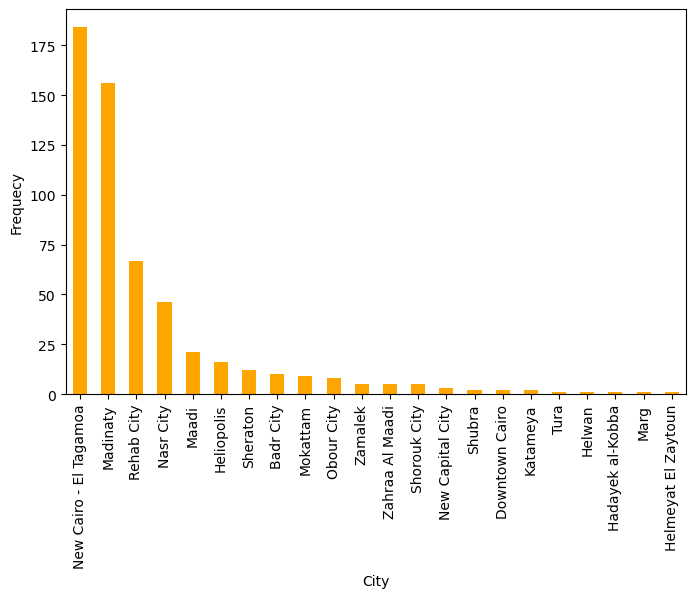

In [23]:
data.Location_City.value_counts().plot(kind='bar',color='orange',figsize=(8,5))
plt.xlabel('City')
plt.ylabel('Frequecy');


As shown **Madinaty** is the most frequent city in the data

### Research Question 2  (What is the average house price in each city?)

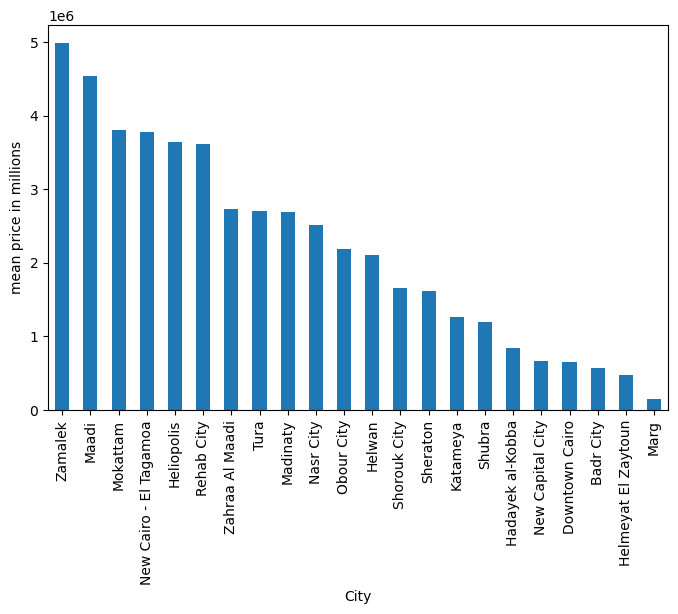

In [24]:
data.groupby('Location_City').Property_price_EGP.mean().sort_values(ascending=False).plot(kind='bar',figsize=(8,5))
plt.xlabel('City')
plt.ylabel('mean price in millions');


As shown,the top five cities in terms of mean home prices are **(Zamalek, Maadi, New Cairo-EL Tagamoa, Mokattam, Heliopolis)**

### Research Question 3 (What is the average house space in each city?)

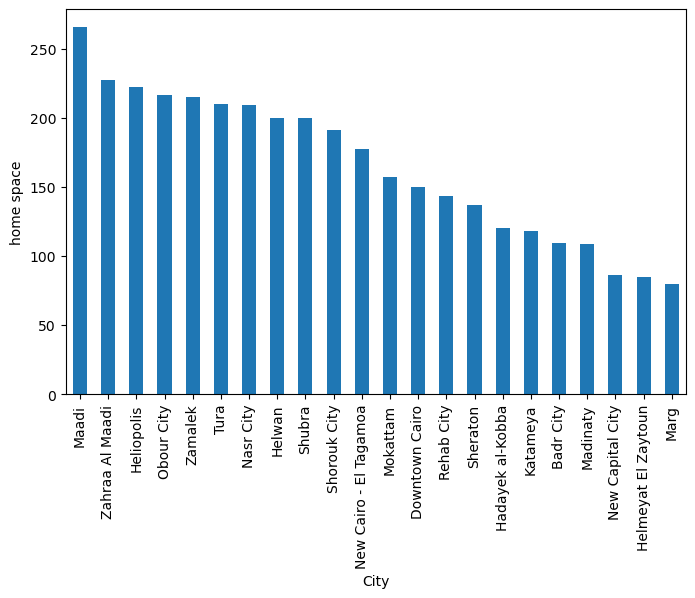

In [25]:
data.groupby('Location_City').Home_Space_SQM.mean().sort_values(ascending=False).plot(kind='bar',figsize=(8,5))
plt.xlabel('City')
plt.ylabel('home space');


As shown,the top five cities in terms of mean home spaces are **(Maadi, Zahraa Al Maadi, Heliopolis, Obour City, Zamalek)**

### Research Question 4 (What is the relationship between space and price?)

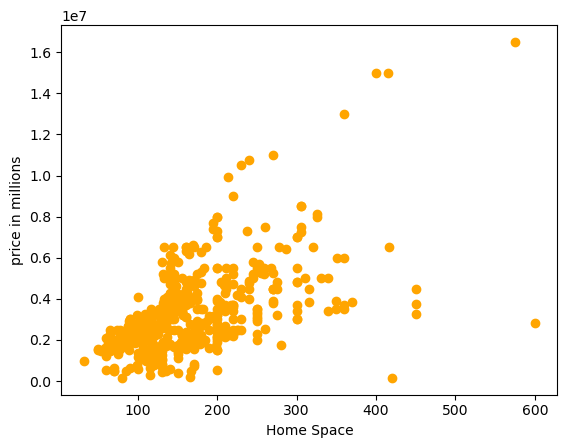

In [26]:
plt.scatter(x = data.Home_Space_SQM,y=data.Property_price_EGP,c='orange');
plt.xlabel('Home Space')
plt.ylabel('price in millions');

the more the space increases the price

### Research Question 5 (In which city is there the lowest AVG price per sqm and in which city is the highest AVG price per sqm?)

In [27]:
g1=data.groupby('Location_City').Home_Space_SQM.sum().to_frame()
g2=data.groupby('Location_City').Property_price_EGP.sum().to_frame()

In [28]:
res=pd.concat([g1,g2],axis=1)

In [29]:
res.head()

,Home_Space_SQM,Property_price_EGP
Location_City,,
Badr City,1095,5698000.0
Downtown Cairo,300,1300000.0
Hadayek al-Kobba,120,850000.0
Heliopolis,3559,58300000.0
Helmeyat El Zaytoun,85,470000.0


In [30]:
res['SQM_price']=res.Property_price_EGP/res.Home_Space_SQM
res.head()

,Home_Space_SQM,Property_price_EGP,SQM_price
Location_City,,,
Badr City,1095,5698000.0,5203.652968
Downtown Cairo,300,1300000.0,4333.333333
Hadayek al-Kobba,120,850000.0,7083.333333
Heliopolis,3559,58300000.0,16381.005901
Helmeyat El Zaytoun,85,470000.0,5529.411765


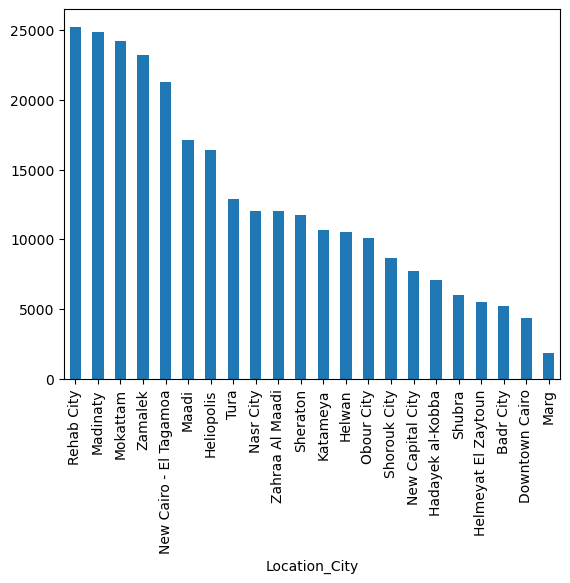

In [31]:
res['SQM_price'].sort_values(ascending=False).plot(kind='bar');

As shown, the lowest price per SQM in the **Marg**, while the highest price per SQM in **Madinaty**

### Research Question 6 (What is the percentage of houses in which the price per SQM is less than the average price per SQM in the same city?)

In [32]:
res.reset_index(inplace=True)

In [33]:
res

,Location_City,Home_Space_SQM,Property_price_EGP,SQM_price
0,Badr City,1095,5698000.0,5203.652968
1,Downtown Cairo,300,1300000.0,4333.333333
2,Hadayek al-Kobba,120,850000.0,7083.333333
3,Heliopolis,3559,58300000.0,16381.005901
4,Helmeyat El Zaytoun,85,470000.0,5529.411765
5,Helwan,200,2100000.0,10500.000000
6,Katameya,236,2525000.0,10699.152542
7,Maadi,5572,95250100.0,17094.418521
8,Madinaty,16922,420480000.0,24848.126699
9,Marg,80,150000.0,1875.000000


In [34]:
data.reset_index(drop=True,inplace=True)

In [35]:
data.shape

(558, 6)

In [36]:
unique_cities=data.Location_City.unique().tolist()
new_frame=data.copy()
new_frame['SQM_price']=0
for city in unique_cities :
    for i in range(0,len(data)):
        if city == data.Location_City[i]:
            SQM_price = data.Property_price_EGP[i]/data.Home_Space_SQM[i]
            if SQM_price >= res.loc[res['Location_City'] == city].SQM_price.item():
                new_frame.drop(i,axis=0,inplace=True)
            else :
                new_frame['SQM_price'][i]=SQM_price
                
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [37]:
new_frame

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,SQM_price
0,2700000.0,Cairo,New Cairo - El Tagamoa,3,2,200,13500
4,2750000.0,Cairo,New Cairo - El Tagamoa,3,2,200,13750
7,2400000.0,Cairo,New Cairo - El Tagamoa,3,1,220,10909
8,2750000.0,Cairo,Madinaty,3,2,116,23706
13,2400000.0,Cairo,Maadi,3,3,205,11707
...,...,...,...,...,...,...,...
551,2700000.0,Cairo,Rehab City,3,3,119,22689
552,308000.0,Cairo,Badr City,3,1,115,2678
554,1600000.0,Cairo,New Cairo - El Tagamoa,3,3,160,10000
555,3250000.0,Cairo,Maadi,4,4,450,7222


<AxesSubplot:>

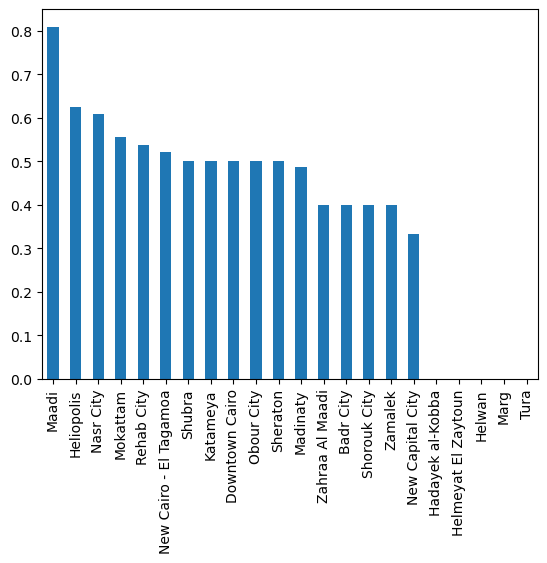

In [38]:
(new_frame.Location_City.value_counts()/data.Location_City.value_counts()).sort_values(ascending=False).plot(kind='bar')

### Research Question 7 (What is the chepeast  price per SQM house?)

In [39]:
new_frame.groupby('Location_City').SQM_price.min()

Location_City
Badr City                  2678
Downtown Cairo             3461
Heliopolis                 2750
Katameya                   8478
Maadi                      7222
Madinaty                  14351
Mokattam                   6538
Nasr City                  4235
New Cairo - El Tagamoa      372
New Capital City           2994
Obour City                 7692
Rehab City                 8080
Sheraton                   6666
Shorouk City               6250
Shubra                     2666
Zahraa Al Maadi           11142
Zamalek                   12333
Name: SQM_price, dtype: int64

In [40]:
new_frame.query('SQM_price <= 372.023810')

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,SQM_price
246,156250.0,Cairo,New Cairo - El Tagamoa,4,3,420,372


<a id='conclusions'></a>
## Conclusions

**- Madinaty is the most frequent city in the data**

**- the top five cities in terms of mean home prices are (Zamalek, Maadi, New Cairo-EL Tagamoa, Mokattam, Heliopolis)**

**- the top five cities in terms of mean home spaces are (Maadi, Zahraa Al Maadi, Heliopolis, Obour City, Zamalek)**

**- the more the space increases the price**

**- the lowest price per SQM in the Marg, while the highest price per SQM in Madinaty**
